In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pathlib import Path
import os
import csv
import os
# os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans
# rcParams['figure.figsize'] = 9, 6
import networkx as nx

In [81]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')
files = os.listdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

datanames = []

for f in files:
    name = f[16:len(f)-4]
    datanames.append(name)
    try:
        df = pd.read_csv('{}'.format(f))
        vars()['df_'+name] = df
    except KeyError:
        print('help!')
        continue


In [82]:
X = np.asarray(df__C1_2_1['XCOORD.'])
Y = np.asarray(df__C1_2_1['YCOORD.'])
XY = np.array((X,Y)).T
# XY

c:\Users\medco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


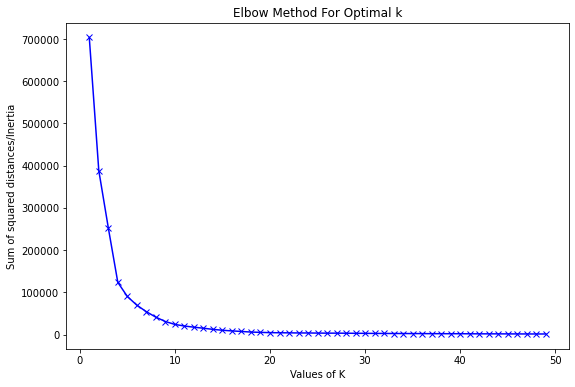

In [4]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,50)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(XY)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

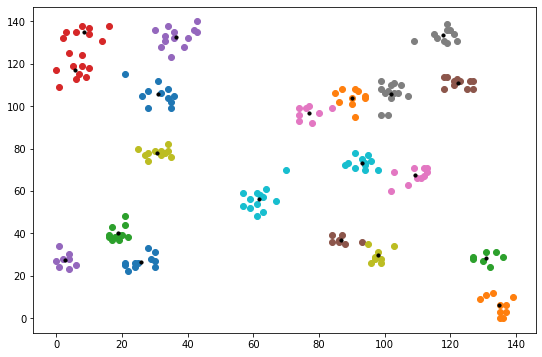

210

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=1234)
label = kmeans.fit_predict(XY)

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(XY[label == i , 0] , XY[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
# plt.legend()
plt.show()

df = pd.DataFrame(XY,columns=['X','Y'])
df['lbl'] = label
df['demand'] = df__C1_2_1['DEMAND']

groupy = df.groupby('lbl').sum()
max(groupy.demand)

In [6]:
df['cust_no'] = df__C1_2_1['CUST NO.']

In [7]:
c_1_2_1 = pd.read_csv('MLC_project_sol_C1_2_1.csv',header=None)
# c_1_2_1

In [8]:
df['ready'] = df__C1_2_1['READY TIME']
df['due'] = df__C1_2_1['DUE DATE']

In [88]:
# for i in df.lbl.unique():
#     if df[df.lbl==i].demand.sum() > 200:
#         print(i)

In [87]:
# df[df.lbl==17].sort_values(by='ready',ascending=True)

In [11]:
u_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [12]:
X = np.asarray(df__C1_2_1['READY TIME'])
Y = np.asarray(df__C1_2_1['DUE DATE'])
XY = np.array((X,Y)).T

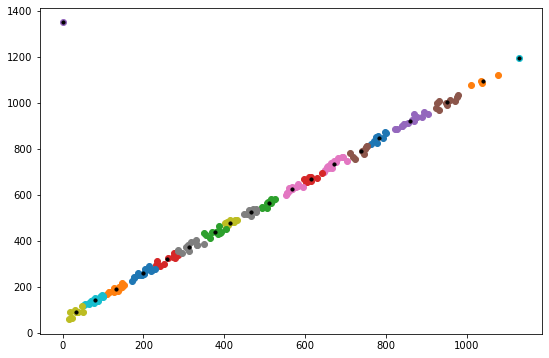

300

In [13]:


kmeans = KMeans(n_clusters=20, random_state=1234)
label = kmeans.fit_predict(XY)

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(XY[label == i , 0] , XY[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
# plt.legend()
plt.show()

df = pd.DataFrame(XY)
df['lbl'] = label
df['demand'] = df__C1_2_1['DEMAND']

groupy = df.groupby('lbl').sum()
max(groupy.demand)

In [21]:
X = np.asarray(df__C1_2_1['XCOORD.'])
Y = np.asarray(df__C1_2_1['YCOORD.'])
XY = np.array((X,Y)).T
# XY

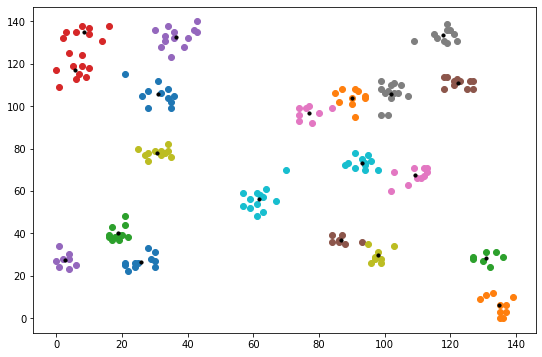

210

In [15]:
kmeans = KMeans(n_clusters=20, random_state=1234)
label = kmeans.fit_predict(XY)

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(XY[label == i , 0] , XY[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
# plt.legend()
plt.show()

df = pd.DataFrame(XY)
df__C1_2_1['lbl'] = label
df__C1_2_1['demand'] = df__C1_2_1['DEMAND']

groupy = df__C1_2_1.groupby('lbl').sum()
max(groupy.demand)

In [83]:

# df17 = df[df.lbl==17].sort_values(by='READY TIME',ascending=True).reset_index()
# df17['diff'] = df17['READY TIME'] - df17['DUE DATE'].shift(1)
# df17 = df17.replace(np.nan,0)
# df17

In [84]:
# df17['outlier'] = ''
# mean = df17['diff'].mean()
# std = df17['diff'].std()

# df17.loc[abs(df17['diff'] - mean)/std > 2,
# 'outlier'] = 'flag'

# # df17

In [7]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')
files = os.listdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

datanames = []

for f in files:
    name = f[16:len(f)-4]
    datanames.append('data'+name)
    try:
        df = pd.read_csv('{}'.format(f))
        vars()['data'+name] = pd.DataFrame()
        vars()['data'+name] = df
    except KeyError:
        print('help!')
        continue

In [67]:
def optimalk(data, capacity):
    X = np.asarray(data['XCOORD.'])
    Y = np.asarray(data['YCOORD.'])
    XY = np.array((X,Y)).T

    for k in range(1,30):
        kmeans = KMeans(n_clusters=k, random_state=1234)
        label = kmeans.fit_predict(XY)

        centroids = kmeans.cluster_centers_
        u_labels = np.unique(label)

        df = pd.DataFrame(XY)
        data['lbl'] = label
        df['lbl'] = data['lbl']
        df['demand'] = data['DEMAND']

        groupy = df.groupby('lbl').agg({'demand':'sum'}).reset_index()
        maximum = max(groupy['demand'])
        if maximum > capacity:
            continue
        else:
            return k

In [85]:
# optimalk(data_C1_2_1, 200)

In [86]:
# sorted = data_C1_2_1.groupby(["lbl","CUST NO.","READY TIME"]).sum()
# sorted = sorted.sort_values(by=["lbl","READY TIME"], ascending=True)
# sorted.to_csv("temp.csv")

In [12]:
capacities = []

for d in datanames:
    if "RC" in d:
        if d[10] != '_':
            c = d[9:11]
        else:
            c = d[9:10]
    else:
        if d[9] != '_':
            c = d[8:10]
        else:
            c = d[8:9]

    capacities.append(int(c)*100)

In [13]:
cap = pd.DataFrame(capacities,columns=['capacities'])
cap['name'] = list(datanames)
# cap

In [28]:
# success = []

# for index, row in cap.iterrows():
#    limit = row['capacities']
#    result = optimalk(vars()[row['name']], limit)
#    if result != None:
#       success.append(row['name'])


In [158]:
success = pd.DataFrame(success, columns=['Dataset Name'])
success.to_csv('optimalk_under30.csv'
)

In [30]:
# route planning
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW')
success = pd.read_csv("optimalk_under30.csv")
# success


In [66]:
# os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')
# files = os.listdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

# for f in files:
#     name = f[16:len(f)-4]
#     try:
#         df = pd.read_csv('{}'.format(f))
#         vars()['df_'+name] = df
#     except KeyError:
#         print('help!')
#         continue

In [68]:
#MUST ALWAYS RUN

for index, row in success.iterrows():
    optimalk = row["Optimal K"]
    X = np.asarray(vars()[row["Dataset Name"]]['XCOORD.'])
    Y = np.asarray(vars()[row["Dataset Name"]]['YCOORD.'])
    XY = np.array((X,Y)).T

    kmeans = KMeans(n_clusters=optimalk, random_state=1234)
    label = kmeans.fit_predict(XY)

    vars()[row["Dataset Name"]]['lbl'] = label

In [94]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/sorted')

for index, row in success.iterrows():
    for lbl in vars()[row["Dataset Name"]]["lbl"].unique():
        temp = vars()[row["Dataset Name"]][vars()[row["Dataset Name"]].lbl==lbl].groupby(["lbl","CUST NO.","READY TIME"]).sum().reset_index()
        temp = temp.sort_values(by=["lbl","READY TIME","DUE DATE"], ascending=True)
        filename = row["Dataset Name"]+"_cluster_"+str(lbl)+".csv"
        temp2 = temp[["CUST NO.","READY TIME"]]
        temp2["source"] = temp2["CUST NO."]
        temp2["target"] = temp2["CUST NO."].shift(-1)
        temp2["weight"] = 1
        temp2 = temp2.drop(columns={"CUST NO.","READY TIME"})
        #temp = temp.drop(columns={"SERVICE TIME"}) #works if we want to clean the resulting .csv files up
        temp2.to_csv(filename)

C:\Users\medco\AppData\Local\Temp/ipykernel_7376/2757651855.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2["source"] = temp2["CUST NO."]
C:\Users\medco\AppData\Local\Temp/ipykernel_7376/2757651855.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2["target"] = temp2["CUST NO."].shift(-1)
C:\Users\medco\AppData\Local\Temp/ipykernel_7376/2757651855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [97]:
import networkx as nx

## Network Analysis

To achieve this, we'd have to get the list of customers from the original dataset (nodes). Then we create a dictionary between those customers and their X/Y coordinates (pos). Then we take the cluster data in the sorted folder and add edges to the nodes. 

Because of the folder differences between OG datasets and cluster .csv files, we're going to need to conduct a few directory changes within the GitHub repo. Speaking of which, it would be good to change the filepath to pull from github itself rather than my local file/folder system (Matthew)

- We'd also want to add an edge to each cluster group from the depot to the first customer and then from the last customer to the depot
- currently "weight" is completely arbitary (weight = 1) based on a Stack Overflow article, but we can possibly think of a way to add some dynamism to it
- Before we draw any of the cluster maps, we're going to need to concatenate the cluster datasets back together, which shouldn't be that hard, just a necessary extra step

At this point, we'll have a visual depiction of the clusters and the routes

From there it's just a matter of how we can optimize any of these routes

In [64]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')
files = os.listdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

datanames = []

for f in files:
    name = f[16:len(f)-4]
    datanames.append('data'+name)
    try:
        df = pd.read_csv('{}'.format(f))
        vars()['data'+name] = pd.DataFrame()
        vars()['data'+name] = df
    except KeyError:
        print('help!')
        continue

In [75]:
Routes = nx.Graph()
Routes.add_nodes_from(data_C1_2_1["CUST NO."])
color_map = []
for index, row in data_C1_2_1.iterrows():
    nodecolor = row["lbl"]
    color_map.append(nodecolor)

In [76]:
CustPos={c:(data_C1_2_1['XCOORD.'][c],data_C1_2_1['YCOORD.'][c])
         for c in data_C1_2_1.index}

In [77]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/sorted')

links = pd.DataFrame()

for i in range(0,21):
    temp = pd.read_csv("data_C1_2_1_cluster_"+str(i)+".csv", index_col=None)
    links = pd.concat([links,temp])

links = links.replace(np.nan,0)
links['target'] = links['target'].astype("int64")
links['source'] = links['source'].astype("int64")
links.reset_index(inplace=True,drop=True)
# links

In [78]:
EN=len(links.index)
edgelist=[(links['source'][j],links['target'][j]) for j in range(EN)]
# edgelist

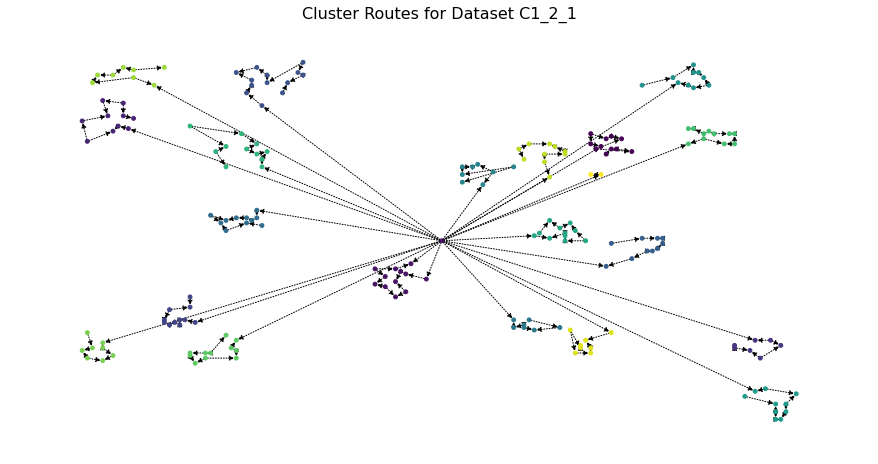

In [79]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/cluster route maps')

Routes.add_edges_from(edgelist)
#visualize the network
plt.figure(figsize = (12,6))
nx.draw(Routes,
pos=CustPos,
with_labels=False,
arrows=True,
node_size=15,
style='dotted',
edge_color='black',
node_color = color_map
) 
plt.title("Cluster Routes for Dataset C1_2_1", fontsize=16)
# plt.savefig("")
plt.show()

In [48]:
# for index, row in success.iterrows():
#     name = row["Dataset Name"][5:]
#     print(name)

In [85]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

for index, row in success.iterrows():
    temp = vars()[row["Dataset Name"]]
    CustPos={c:(temp['XCOORD.'][c], temp['YCOORD.'][c]) 
        for c in temp.index}
    # print(CustPos)

In [93]:
for index, row in success.iterrows():
    os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

    Routes = nx.Graph()
    Routes.add_nodes_from(vars()[row["Dataset Name"]]["CUST NO."])
    color_map = []
    for idx, rw in vars()[row["Dataset Name"]].iterrows():
        nodecolor = rw["lbl"]
        color_map.append(nodecolor)

    temp = vars()[row["Dataset Name"]]
    CustPos={c:(temp['XCOORD.'][c], temp['YCOORD.'][c]) 
        for c in temp.index}

    os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/sorted')

    links = pd.DataFrame()

    for i in range(0,21):
        temp = pd.read_csv(row["Dataset Name"]+"_cluster_"+str(i)+".csv", index_col=None)
        links = pd.concat([links,temp])

    links = links.replace(np.nan,0)
    links['target'] = links['target'].astype("int64")
    links['source'] = links['source'].astype("int64")
    links.reset_index(inplace=True,drop=True)

    EN=len(links.index)
    edgelist=[(links['source'][j],links['target'][j]) for j in range(EN)]

    os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/cluster route maps')

    Routes.add_edges_from(edgelist)

    plt.figure(figsize = (12,6))
    nx.draw(Routes,
        pos=CustPos,
        with_labels=False,
        arrows=True,
        node_size=15,
        style='dotted',
        edge_color='black',
        node_color = color_map
            ) 
    plt.title("Cluster Routes for Dataset "+row["Dataset Name"][5:], fontsize=16)
    plt.savefig(row["Dataset Name"]+"_cluster_routes_map.png")
    plt.close() 

    